Frecuencias:
 4    204
8    103
6     84
3      4
5      3
Name: 1, dtype: int64


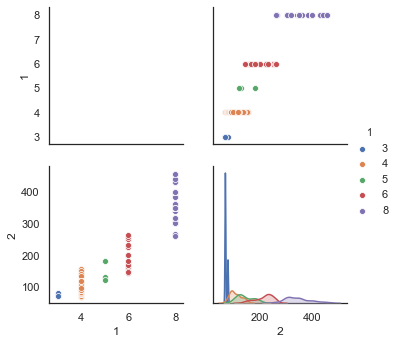

In [42]:
import pandas as pd
import seaborn as sns
sns.set(style="white")

def load_dataset(dataset_url: str, separator: str = '\s+', class_position: int = None, remove: tuple = None):
    """Load a dataset from a specified url into a pandas DataFrame.

    :param str dataset_url: an url from archive.ics.uci.edu
    :param int class_position: column index where classes are defined (starts by 0)
       if left empty (None), no prediction class will be used (intrinsic case).
    """
    # Load dataset as a pandas DataFrame from a specified url.
    dataset = pd.read_csv(dataset_url, sep=separator, header=None)

    # Extrinsic case, dataset comes with its classes.
    if class_position is not None:
        # Extract classes.
        classes = dataset.iloc[:, class_position]
        # Remove classes from the dataset.
        dataset = dataset.drop([class_position,], axis=1)
    
    # Remove attributes.
    if remove is not None:
        dataset.drop(remove, axis=1, inplace=True)
     
    # Intrinsic case, dataset has no classes.
    else:
        classes = None

    return classes, dataset

# def plot_dataset(dataset: pd.DataFrame, class_position: int = None) -> None:
#     # TODO: remove or use the class_position argument.
#     sns.pairplot(dataset, hue=class_position)

def plot_dataset(clase: pd.DataFrame, atributos: pd.DataFrame) -> None:
    dataset = pd.concat([clase,atributos], axis=1)
    sns.pairplot(dataset, hue=1)
    
# Load the example mpg dataset
# mpg = sns.load_dataset("mpg")

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
extrinsic_classes, extrinsic_dataset = load_dataset(dataset_url, class_position=1, remove=[0, 4, 5, 6, 7, 8])

print("Frecuencias:\n",extrinsic_classes.value_counts())

# plot_dataset(extrinsic_dataset, class_position=1)
plot_dataset(extrinsic_classes, extrinsic_dataset)
